In [9]:
import SimpleITK as sitk
import numpy as np
import nibabel as nib
import cv2
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

(256, 256, 256)
(256, 256, 256)


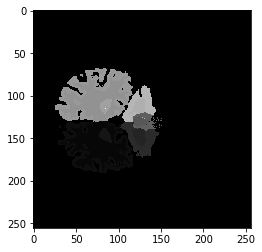

In [20]:
# path = '/data0/brain/OASIS_OAS1_0399_MR1ls/aligned_norm.nii.gz' #segmentation volume
# ds = sitk.ReadImage(path)
# data = sitk.GetArrayFromImage(ds)
# solor/out_seg35.nii.gz
filedir_1 = "/data0/brain/OASIS_OAS1_0310_MR1/seg35.nii.gz"
data1 = np.asarray(nib.load(filedir_1).dataobj)
filedir_2 = "/home/brain1/ants-example1/Test_OASIS_OAS1_0311To0310_OutputANTsPy/ElasticSyNlabel.nii.gz"
data2 = np.asarray(nib.load(filedir_2).dataobj)
# filedir = "/home/brain1/solor/out_seg35.nii.gz"
# data1 = np.asarray(nib.load(filedir).dataobj)
# filedir2 = "/home/brain1/solor/seg35.nii.gz"
# data2 = np.asarray(nib.load(filedir2).dataobj)
print(data1.shape)
print(data2.shape)
plt.imshow(data1[:,:,90],'gray') # 显示图片
plt.show()

In [26]:
def dice_equation(mask1, mask2,intersection_sum,union_Sum,i):
    intersection = (mask1 * mask2).sum()
    union = (mask1 + mask2).sum()
    print(intersection) # 打印交点数目
    print(union) # 打印总点数
    if union != 0: 
        dices = float((2 * intersection) / union) # 计算dice
        # 点数加和
        intersection_sum+=intersection 
        union_Sum+=union
        if i==0: # 排除0标签
            intersection_sum=0
            union_Sum=0
    else:
        dices = 0
    return dices,intersection_sum,union_Sum



def divide_dices(mask1_, 
                 mask2_, 
#                  a:{"我需要三维narry"},
#                  b,
                 times: int = 36):
    intersection_sum=0 # 总交点
    union_Sum=0 # 总点数
    sum1=0 # 平均数分子，分母是times-1

#     intersection_sum2=0
#     union_Sum2=0
    for i in range(0, times):
#         print(i)
        
        mask_one = np.where(mask1_ == i, 1, 0)
        mask_two = np.where(mask2_ == i, 1, 0)
#         mask_1 = np.where(a == i, 1, 0)
#         mask_2 = np.where(b == i, 1, 0)

        info1,intersection_sum,union_Sum = dice_equation(mask_one, mask_two,intersection_sum,union_Sum,i)
        sum1+=info1
#         info2 = dice_equation(mask_1, mask_2,intersection_sum,union_Sum)
        print(i,">>>",info1)
        if i==0:
            sum1=0
        if i==times-1:
            print(intersection_sum,union_Sum)
            print("加权平均",2*intersection_sum/union_Sum)
            print("简单平均",sum1/(times-1))

35
35.0


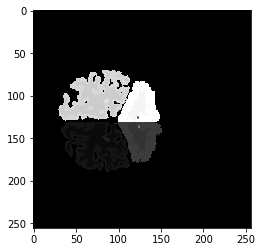

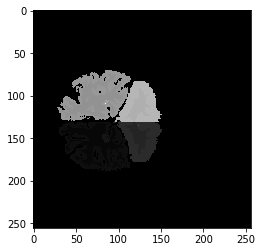

15597613
31356640
0 >>> 0.9948523183606407
167207
411828
1 >>> 0.8120234661072098
164096
461148
2 >>> 0.7116847519668306
7294
18834
3 >>> 0.7745566528618456
99
449
4 >>> 0.44097995545657015
11698
27332
5 >>> 0.8559929752670862
46867
104927
6 >>> 0.8933258360574494
6079
13583
7 >>> 0.8950894500478539
3016
7107
8 >>> 0.848740678204587
4877
11056
9 >>> 0.8822358900144718
1436
3391
10 >>> 0.8469478030079622
861
2171
11 >>> 0.7931828650391525
1201
2954
12 >>> 0.8131347325660122
18397
40548
13 >>> 0.9074183683535563
3350
7887
14 >>> 0.8494991758590085
1334
3066
15 >>> 0.8701891715590345
637
1480
16 >>> 0.8608108108108108
3464
7976
17 >>> 0.8686058174523571
10
64
18 >>> 0.3125
243
1226
19 >>> 0.3964110929853181
164359
409775
20 >>> 0.8021914465255323
157403
451812
21 >>> 0.6967632555133552
7783
19782
22 >>> 0.7868769588514811
111
446
23 >>> 0.4977578475336323
11750
28287
24 >>> 0.8307703185208754
45987
104038
25 >>> 0.8840423691343547
5991
13207
26 >>> 0.9072461573408042
3240
7607
27 >>> 0.85

In [27]:
data1 = np.around(data1,0)
data2 = np.around(data2,0)
print(data1.max())
print(data2.max())
plt.imshow(data1[:,:,80],'gray') # 显示图片
plt.show()

plt.imshow(data2[:,:,80],'gray') # 显示图片
plt.show()

# print(data1[:,100,90])
# print(data2[:,100,90])

divide_dices(data1,data2,36)



In [ ]:
filedir = "/data0/brain/OASIS_OAS1_0399_MR1/aligned_orig.nii.gz"
data2 = np.asarray(nib.load(filedir).dataobj)
print(data2.shape)
plt.imshow(data2[:,:,50],'gray') # 显示图片
plt.show()

In [ ]:
filedir = "/data0/brain/OASIS_OAS1_0399_MR1/aligned_seg35.nii.gz"
data1 = np.asarray(nib.load(filedir).dataobj)
print(data1.shape)
plt.imshow(data1[:,:,50],'gray') # 显示图片
plt.show()

In [ ]:
filedir = "/data0/brain/OASIS_OAS1_0399_MR1/aligned_seg4.nii.gz"
data1 = np.asarray(nib.load(filedir).dataobj)
print(data1.shape)
plt.imshow(data1[:,:,50],'gray') # 显示图片
plt.show()

In [ ]:
filedir = "/data0/brain/OASIS_OAS1_0399_MR1/norm.nii.gz"
data1 = np.asarray(nib.load(filedir).dataobj)
print(data1.shape)
plt.imshow(data1[:,:,180],'gray') # 显示图片
plt.show()

In [ ]:
filedir = "/data0/brain/OASIS_OAS1_0399_MR1/orig.nii.gz"
data1 = np.asarray(nib.load(filedir).dataobj)
print(data1.shape)
plt.imshow(data1[:,:,50
                ],'gray') # 显示图片
plt.show()

filedir = "/data0/brain/OASIS_OAS1_0399_MR1/slice_norm.nii.gz"
data1 = np.asarray(nib.load(filedir).dataobj)
print(data1.shape)
plt.imshow(data1[:,:,0],'gray') # 显示图片
plt.show()

In [ ]:
filedir = "/data0/brain/OASIS_OAS1_0399_MR1/slice_norm.nii.gz"
data1 = np.asarray(nib.load(filedir).dataobj)
print(data1.shape)
plt.imshow(data1[:,:,0],'gray') # 显示图片
plt.show()

In [ ]:
def dice_coefficient(a, b):
    """dice coefficient 2nt/na + nb."""
    diao = 0.001
    a = a.reshape(-1)
    b = b.reshape(-1)
    res = (a*b).sum()
    dice = (res*2)/(a.sum()+b.sum())+diao
    return dice

# filedir = "/home/brain1/solor/out_seg35.nii.gz"
# data1 = np.asarray(nib.load(filedir).dataobj)
# print(data1)
print(data1.shape)
print(data1.max())
# plt.imshow(data1[:,:,79],'gray') # 显示图片
# plt.show()

# filedir ="/home/brain1/solor/seg35.nii.gz"
# data2 = np.asarray(nib.load(filedir).dataobj)
print(data2.max())
print(data2.shape)



dice = 0
data1 = np.array(data3, dtype = float)
data2 = np.array(data4, dtype = float)
dice = dice_coefficient(data1,data2)
print(dice)

# info = set(list(data1))
# print(data1[70])


for k in range(0,256,10):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(data1[:,:,k],'hot') # 显示图片
    plt.subplot(1,2,2)
    plt.imshow(data2[:,:,k],'hot') # 显示图片
    plt.show()
    

In [ ]:
filedir = "/data0/brain/OASIS_OAS1_0311_MR1/norm.nii.gz"
data1 = np.asarray(nib.load(filedir).dataobj)
print(data1.shape)
plt.imshow(data1[:,:,180],'gray') # 显示图片
plt.show()

In [ ]:
filedir = "/data0/brain/OASIS_OAS1_0310_MR1/norm.nii.gz"
data1 = np.asarray(nib.load(filedir).dataobj)
print(data1.shape)
plt.imshow(data1[:,:,180],'gray') # 显示图片
plt.show()

In [ ]:
import ants
import os

# Read in the images

targetdir = '/data0/brain/OASIS_OAS1_0001_MR1/'
registrationdir = '/data0/brain/OASIS_OAS1_0002_MR1/'

fixedImageFile = targetdir + 'norm.nii.gz'
fixedImage = ants.image_read( fixedImageFile, dimension = 3 )
movingImageFile = registrationdir + 'norm.nii.gz'
movingImage = ants.image_read( movingImageFile, dimension = 3 )

In [ ]:
print(movingImage.Components)